In [7]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras import backend as K

PATH = "cell_images/"
print(os.listdir(PATH))

['Uninfected', 'Parasitized']


In [8]:
# all image path of parasitized
paths_para=glob.glob(os.path.join(PATH,'Parasitized','*.png'))
paths_uninf=glob.glob(os.path.join(PATH,'Uninfected','*.png'))
len(paths_para), len(paths_uninf)

(13779, 13779)

In [9]:
# show one
path=paths_para[0]
img=cv2.imread(path) # cv2 stores image in BGR format
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # transforming to RGB format
img.shape

(124, 121, 3)

In [4]:
# helper to get images
def get_data(path, resize_dim=96):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

## Get the data

In [5]:
parasite_images=np.array([get_data(path) for path in paths_para])
parasite_images.shape

(13779, 96, 96, 3)

In [6]:
uninf_images=np.array([get_data(path) for path in paths_uninf])
uninf_images.shape

(13779, 96, 96, 3)

## Make labels

In [10]:
para_label = np.array([1 for _ in range(len(parasite_images))])
uninf_label = np.array([0 for _ in range(len(uninf_images))])

para_label.shape, uninf_label.shape

((13779,), (13779,))

## Data set initialize

In [11]:
x_all = np.concatenate((parasite_images, uninf_images), axis=0)
y_all = np.concatenate((para_label, uninf_label), axis=0)
print(x_all.shape, y_all.shape)

#train = shuffle(train, random_state=123)

(27558, 96, 96, 3) (27558,)


## Show an image

Index number: 17841
Label: 0


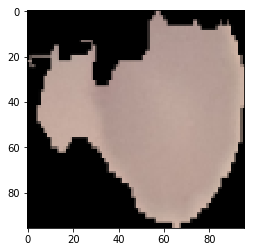

In [12]:
idx = random.randint(0, len(x_all))
print("Index number: {}".format(idx))
print("Label: {}".format(y_all[idx]))
plt.imshow(x_all[idx])

## Show many images

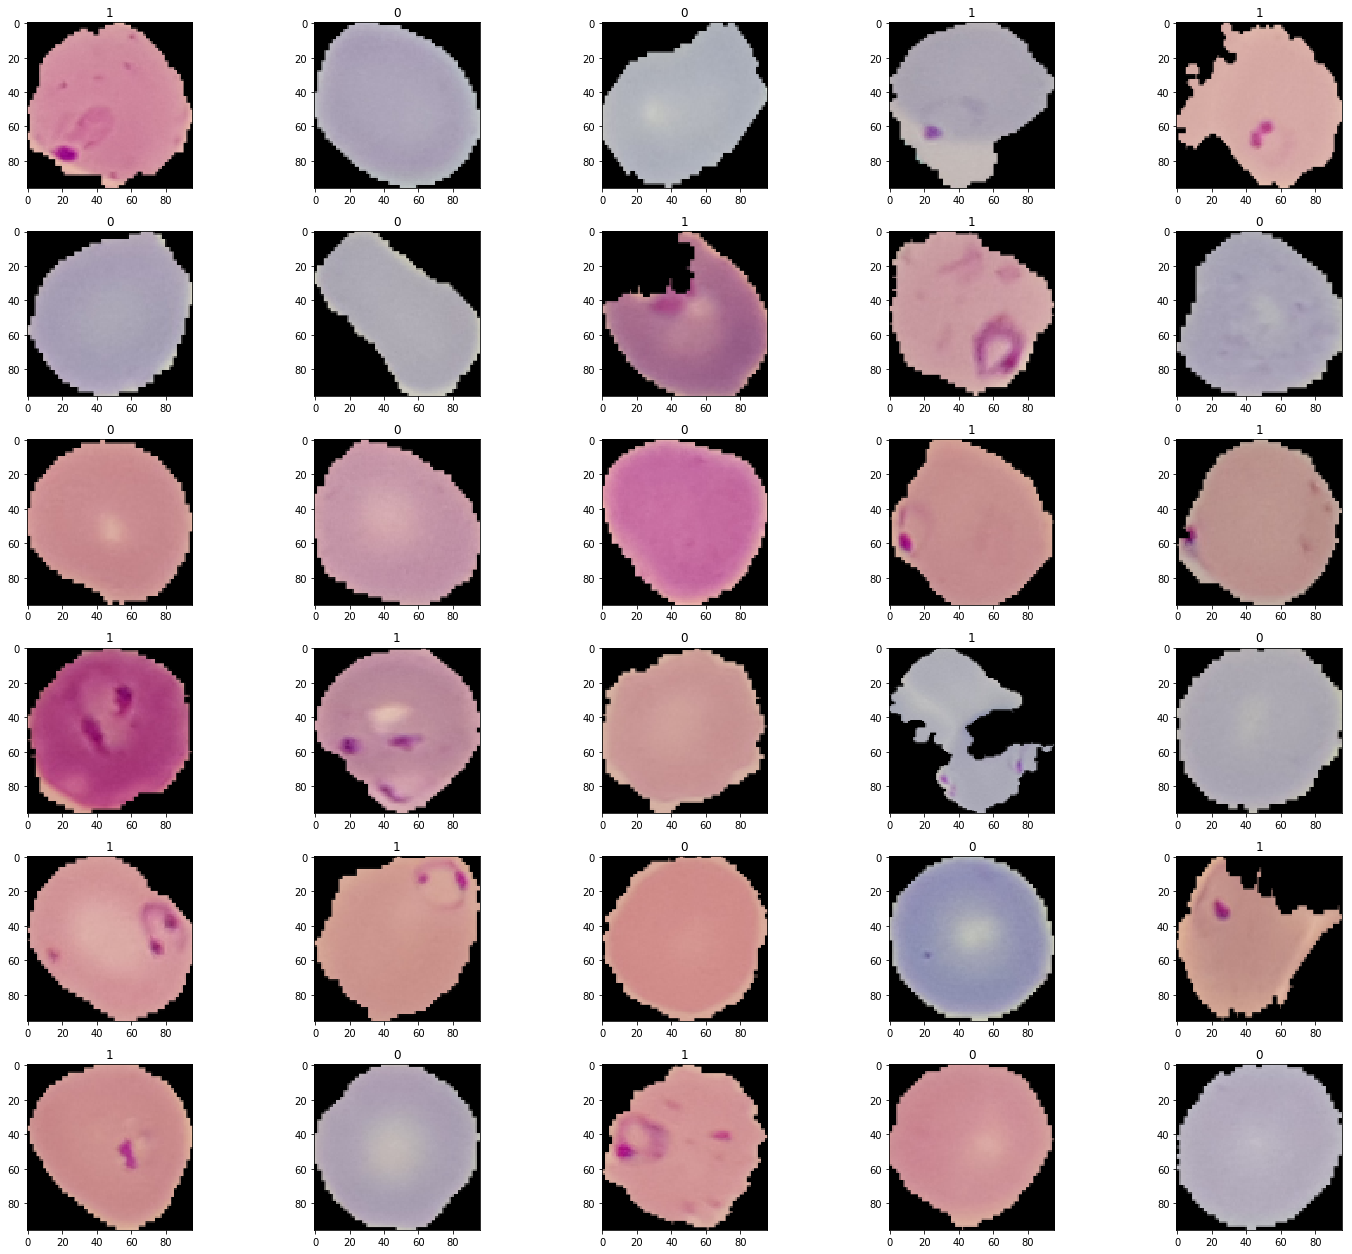

In [13]:
plt.figure(figsize=(20,20))
columns = 5

lower = 0
upper = 30 

for i in range(upper):
    ax = plt.subplot(upper / columns + 1, columns, i + 1)
    idx = random.randint(0, len(x_all))
    ax.set_title(y_all[idx])
    plt.imshow(x_all[idx], cmap='gray') # binary
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Make training and testing sets

In [14]:
indices=list(range(len(x_all)))
np.random.seed(42)
np.random.shuffle(indices)

ind=int(len(indices)*0.95)
# train data
input_features=x_all[indices[:ind]] 
labels=y_all[indices[:ind]]
# validation data
x_test=x_all[indices[-(len(indices)-ind):]] 
y_test=y_all[indices[-(len(indices)-ind):]]

In [15]:
print(input_features.shape, labels.shape)
print(x_test.shape, y_test.shape)

(26180, 96, 96, 3) (26180,)
(1378, 96, 96, 3) (1378,)


In [16]:
x_train, x_val, y_train, y_val = train_test_split(input_features, labels, test_size=0.1, random_state=1)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(23562, 96, 96, 3) (2618, 96, 96, 3) (23562,) (2618,)


In [17]:
# one hot encoded vectors
num_classes = 2

y_train = np_utils.to_categorical(y_train,num_classes)
y_val = np_utils.to_categorical(y_val,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
print(y_train.shape, y_val.shape, y_test.shape)

(23562, 2) (2618, 2) (1378, 2)


In [18]:
# check input
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(23562, 96, 96, 3) (23562, 2) (2618, 96, 96, 3) (2618, 2)


In [19]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)

np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)

np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)

In [20]:
x = np.load("x_train.npy")
y = np.load("y_train.npy")
x.shape, y.shape

((23562, 96, 96, 3), (23562, 2))